In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Color Codes

In [2]:
background = "#EAE7FA"
periwinkle = "#838BC2"
rosewater = "#D9A1A0"
lavender = "#A58CB3"

#### Read Dataframe

In [3]:
df = pd.read_csv("world_population.csv")

In [4]:
# Ensure that floating point numbers are displayed with 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

## Basic Information About Data

In [5]:
df.head()

Rank CCA3         Country           Capital Continent  2022 Population  \
0    36  AFG     Afghanistan             Kabul      Asia      41128771.00   
1   138  ALB         Albania            Tirana    Europe       2842321.00   
2    34  DZA         Algeria           Algiers    Africa      44903225.00   
3   213  ASM  American Samoa         Pago Pago   Oceania         44273.00   
4   203  AND         Andorra  Andorra la Vella    Europe         79824.00   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0      38972230.00      33753499.00      28189672.00      19542982.00   
1       2866849.00       2882481.00       2913399.00       3182021.00   
2      43451666.00      39543154.00      35856344.00      30774621.00   
3         46189.00         51368.00         54849.00         58230.00   
4         77700.00         71746.00         71519.00         66097.00   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0      10694796.00      12486631.00      10752971.00   652230.00   
1       3295066.00       2941651.00       2324731.00    28748.00   
2      25518074.00      18739378.00      13795915.00  2381741.00   
3         47818.00         32886.00         27075.00      199.00   
4         53569.00         35611.00         19860.00      468.00   

   Density (per km²)  Growth Rate  World Population Percentage  
0              63.06         1.03                         0.52  
1              98.87         1.00                         0.04  
2              18.85         1.02                         0.56  
3             222.48         0.98                         0.00  
4             170.56         1.01                         0.00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [7]:
# Generate descriptive statistics summary for the DataFrame
df.describe()

Rank  2022 Population  2020 Population  2015 Population  \
count 234.00           230.00           233.00           230.00   
mean  117.50      34632250.88      33600710.95      32066004.16   
std    67.69     137889172.44     135873196.61     131507146.34   
min     1.00           510.00           520.00           564.00   
25%    59.25        419738.50        406471.00        394295.00   
50%   117.50       5762857.00       5456681.00       5244415.00   
75%   175.75      22653719.00      21522626.00      19730853.75   
max   234.00    1425887337.00    1424929781.00    1393715448.00   

       2010 Population  2000 Population  1990 Population  1980 Population  \
count           227.00           227.00           229.00           229.00   
mean       30270164.48      26840495.26      19330463.93      16282884.78   
std       126074183.54     113352454.57      81309624.96      69345465.54   
min             596.00           651.00           700.00           733.00   
25%          382726.50        329470.00        261928.00        223752.00   
50%         4889741.00       4491202.00       3785847.00       3135123.00   
75%        16825852.50      15625467.00      11882762.00       9817257.00   
max      1348191368.00    1264099069.00    1153704252.00     982372466.00   

       1970 Population  Area (km²)  Density (per km²)  Growth Rate  \
count           230.00      232.00             230.00       232.00   
mean       15866499.13   581663.75             456.81         1.01   
std        68355859.75  1769133.06            2083.74         0.01   
min             752.00        1.00               0.03         0.91   
25%          145880.50     2567.25              36.60         1.00   
50%         2511718.00    77141.00              95.35         1.01   
75%         8817329.00   414643.25             236.88         1.02   
max       822534450.00 17098242.00           23172.27         1.07   

       World Population Percentage  
count                       234.00  
mean                          0.43  
std                           1.71  
min                           0.00  
25%                           0.01  
50%                           0.07  
75%                           0.28  
max                          17.88

### Null Data Detection And handling

In [8]:
# This function calculates the null values and their percentages in the data, 
# providing insights into the necessity of data imputation and how it can be done.
def null_value_info(df):
    total_nulls = df.isnull().sum()
    percentage_nulls = (total_nulls / len(df)) * 100
    df_null_data = pd.DataFrame({"Total Null Count":total_nulls,
                                 "Percentage": percentage_nulls})
    return df_null_data

In [9]:
df_null_data = null_value_info(df)
df_null_data.T

Rank  CCA3  Country  Capital  Continent  2022 Population  \
Total Null Count  0.00  0.00     0.00     0.00       0.00             4.00   
Percentage        0.00  0.00     0.00     0.00       0.00             1.71   

                  2020 Population  2015 Population  2010 Population  \
Total Null Count             1.00             4.00             7.00   
Percentage                   0.43             1.71             2.99   

                  2000 Population  1990 Population  1980 Population  \
Total Null Count             7.00             5.00             5.00   
Percentage                   2.99             2.14             2.14   

                  1970 Population  Area (km²)  Density (per km²)  Growth Rate  \
Total Null Count             4.00        2.00               4.00         2.00   
Percentage                   1.71        0.85               1.71         0.85   

                  World Population Percentage  
Total Null Count                         0.00  
Percentage                               0.00

#### Linear interpolation fills missing data based on the linear relationship between two data points. It generally provides a sensible result for population data, as populations tend to increase or decrease steadily over time.

In [10]:

years = ["2022 Population","2020 Population","2015 Population","2010 Population","2000 Population","1990 Population","1980 Population","1970 Population"]
df[years] = df[years].interpolate(method = "linear", axis = 1)


In [11]:
df_null_data = null_value_info(df)
df_null_data.T

Rank  CCA3  Country  Capital  Continent  2022 Population  \
Total Null Count  0.00  0.00     0.00     0.00       0.00             4.00   
Percentage        0.00  0.00     0.00     0.00       0.00             1.71   

                  2020 Population  2015 Population  2010 Population  \
Total Null Count             0.00             0.00             0.00   
Percentage                   0.00             0.00             0.00   

                  2000 Population  1990 Population  1980 Population  \
Total Null Count             0.00             0.00             0.00   
Percentage                   0.00             0.00             0.00   

                  1970 Population  Area (km²)  Density (per km²)  Growth Rate  \
Total Null Count             0.00        2.00               4.00         2.00   
Percentage                   0.00        0.85               1.71         0.85   

                  World Population Percentage  
Total Null Count                         0.00  
Percentage                               0.00

### Correlation Matrix

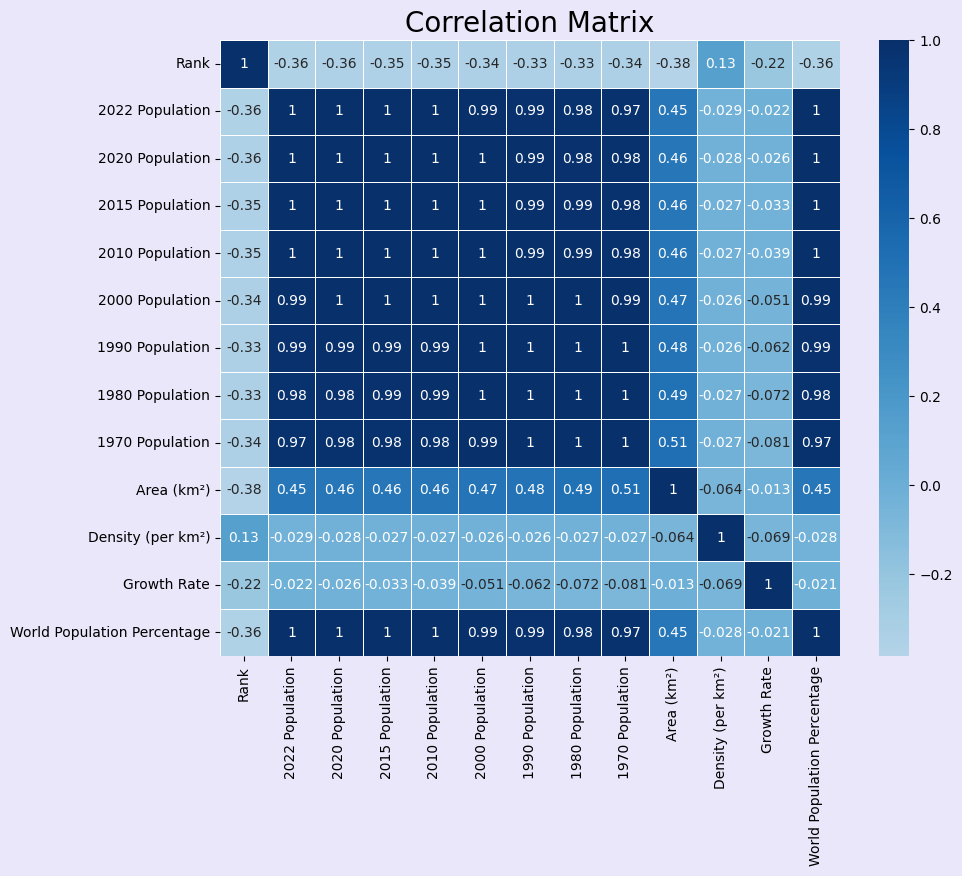

In [12]:
# Selects columns from the DataFrame that contain numerical data types.
# This allows for focusing on columns that contain numeric values for further analysis or processing.
numeric_df = df.select_dtypes(include=["number"])

# Selects columns from the DataFrame that contain numerical data types.
# This allows for focusing on columns that contain numeric values for further analysis or processing.
df_corr = numeric_df.corr()

# reates a heatmap visualization of the correlation matrix.
# This helps to visually identify patterns and relationships between variables in the dataset.
plt.figure(figsize=(10, 8), facecolor = background)
sns.heatmap(df_corr, annot = True, cmap = "Blues", center = 0, linewidths = 0.5, linecolor = "white")
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

## Average Population of Continents in 2022

#### y-ticks Number Formatter

In [13]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'

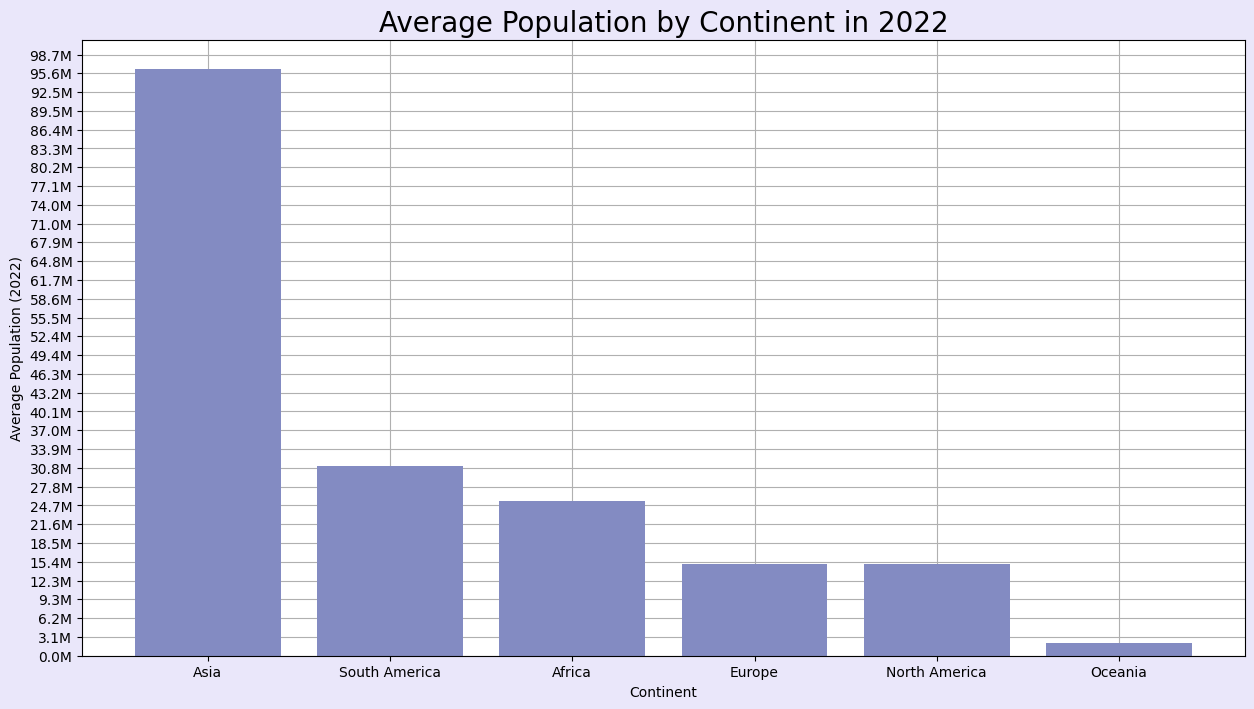

In [14]:
continent_average_population = pd.DataFrame(df.groupby("Continent")["2022 Population"].mean().reset_index().sort_values(by = "2022 Population", ascending = False))

plt.figure(figsize=(15, 8), facecolor = background)
plt.bar(continent_average_population["Continent"], continent_average_population["2022 Population"], color = periwinkle)


average_pop = continent_average_population["2022 Population"].mean()
max_pop = continent_average_population["2022 Population"].max()
plt.yticks(np.arange(0, max_pop + average_pop / 10, average_pop / 10))

plt.grid()
plt.gca().set_axisbelow(True)
plt.xlabel("Continent")
plt.ylabel("Average Population (2022)")
plt.title("Average Population by Continent in 2022",fontsize = 20)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))


plt.show()


## Average Population of Continents Over the Years

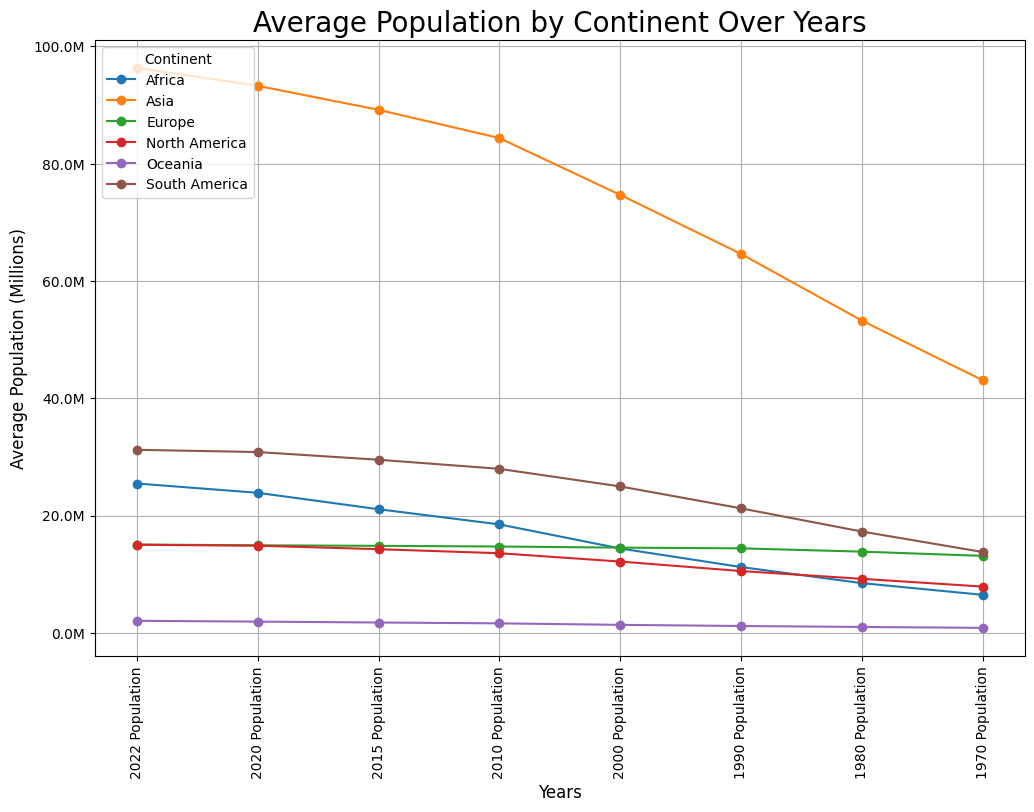

In [15]:
average_population_years = df.groupby("Continent")[years].mean().reset_index()

plt.figure(figsize=(12, 8), facecolor='white')
for i, continent in enumerate(average_population_years["Continent"]):
    plt.plot(years, average_population_years.loc[i, years], marker='o', label=continent)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.xlabel("Years", fontsize=12)
plt.ylabel("Average Population (Millions)", fontsize=12)
plt.title("Average Population by Continent Over Years", fontsize=20)
plt.xticks(rotation=90)
plt.legend(title="Continent", loc="upper left")

plt.grid()
plt.gca().set_axisbelow(True)
plt.show()


In [16]:
average_population_years

Continent  2022 Population  2020 Population  2015 Population  \
0         Africa      25455879.68      23871435.26      21071535.22   
1           Asia      96327387.31      93258247.22      89165003.64   
2         Europe      15055371.82      14915843.92      14829600.84   
3  North America      15007403.40      14855914.82      14259596.25   
4        Oceania       2046386.32       1910148.96       1756664.48   
5  South America      31201186.29      30823574.50      29509599.71   

   2010 Population  2000 Population  1990 Population  1980 Population  \
0      18485062.70      14381782.91      11216897.30       8474928.49   
1      84356265.38      74674846.44      64614942.50      53240197.82   
2      14712278.68      14521879.40      14403708.23      13842158.91   
3      13568016.28      12151739.60      10531660.62       9207334.03   
4       1613163.65       1357512.09       1162774.87        996532.17   
5      27959255.25      24959953.82      21224743.93      17270643.29   

   1970 Population  
0       6479649.07  
1      43076460.42  
2      13118479.82  
3       7885865.15  
4        846968.26  
5      13781939.71

## Top 10 Most Populated Countries

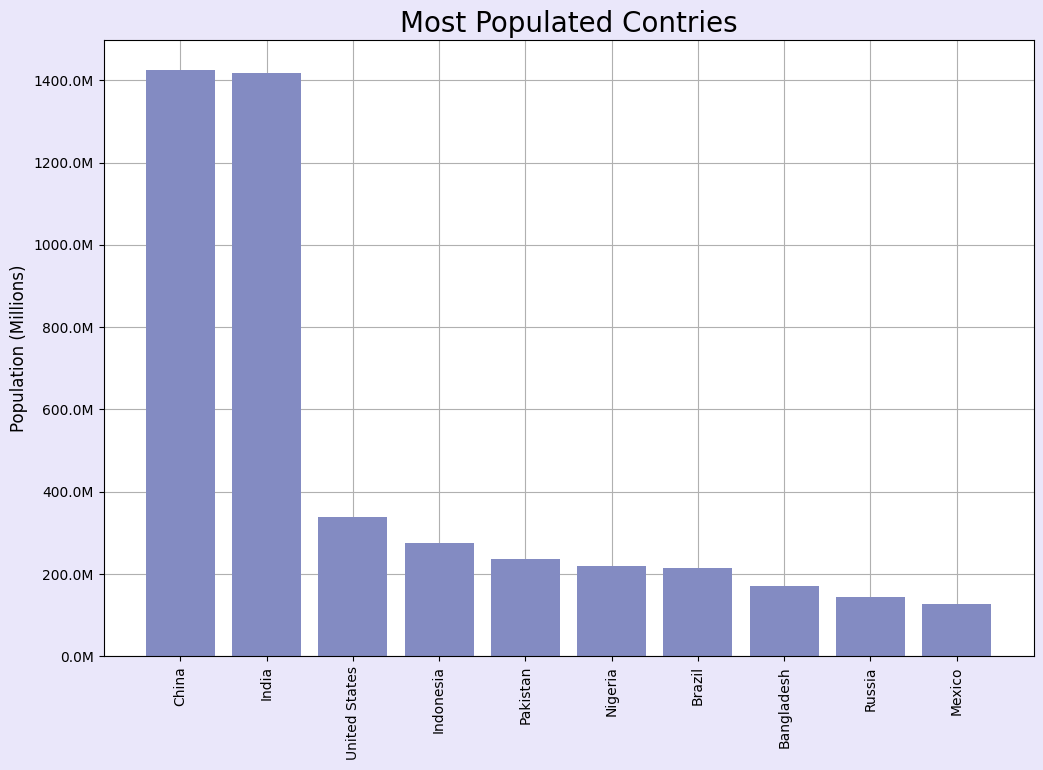

In [17]:
ten_most_populous_countries = df[["Country","2022 Population"]].sort_values(by = "2022 Population", ascending = False).head(10)

plt.figure(figsize = (12, 8), facecolor=background)

plt.bar(ten_most_populous_countries["Country"], ten_most_populous_countries["2022 Population"], color = periwinkle)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.ylabel("Population (Millions)", fontsize = 12)
plt.title("Most Populated Contries", fontsize = 20)

plt.xticks(rotation = 90)

plt.grid()
plt.gca().set_axisbelow(True)

plt.show()

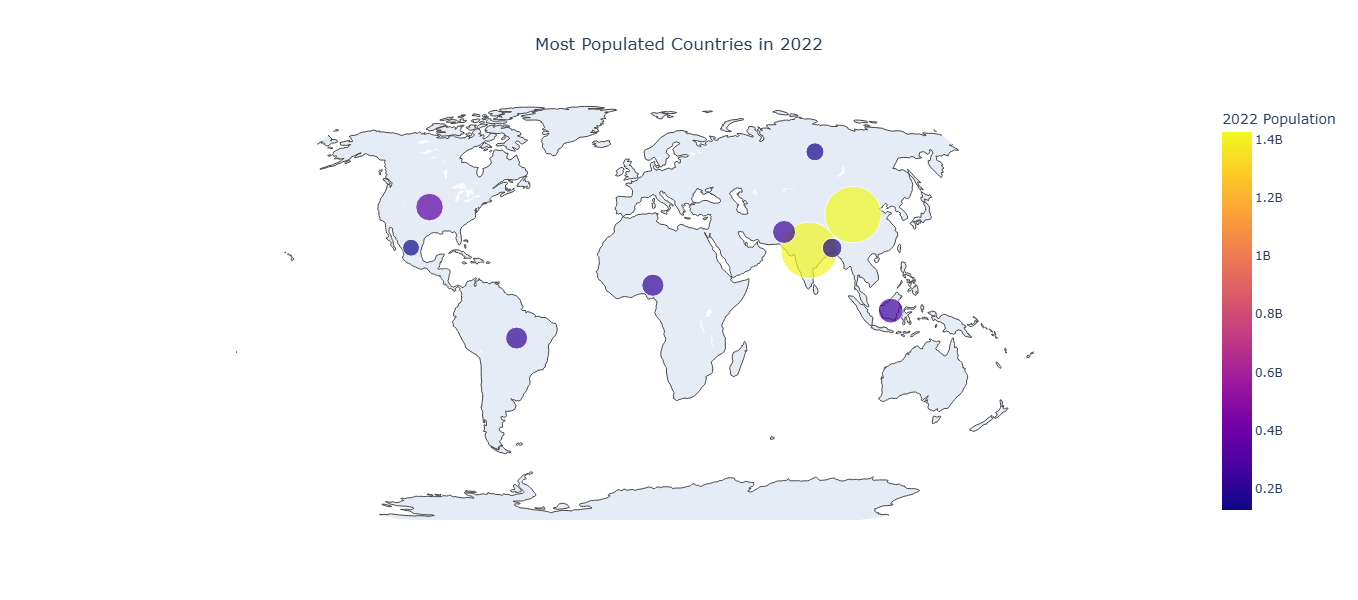

In [18]:
import plotly.express as px

fig = px.scatter_geo(ten_most_populous_countries,
                     locations="Country",
                     locationmode="country names",
                     color="2022 Population",
                     hover_name="Country",
                     size="2022 Population",
                     projection="natural earth",
                     title="Most Populated Countries in 2022",
                     color_continuous_scale=px.colors.sequential.Plasma,
                     size_max=40)
fig.update_layout(
    title_text = "Most Populated Countries in 2022",
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = True,
        projection_type = "natural earth"
    ),
     width=1000,
     height=600
)

fig.show()


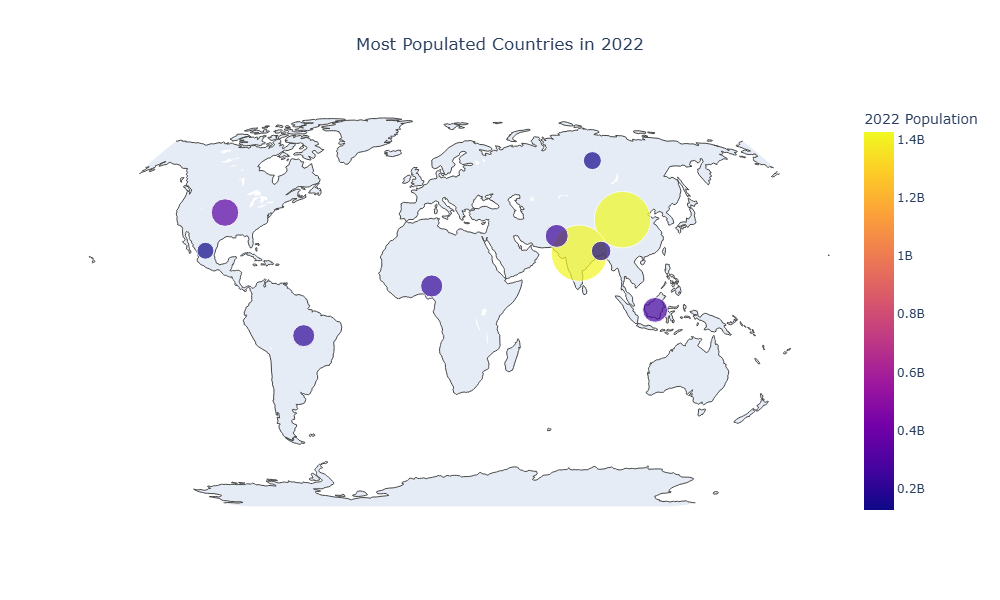

## Top 10 Least Populated Countries

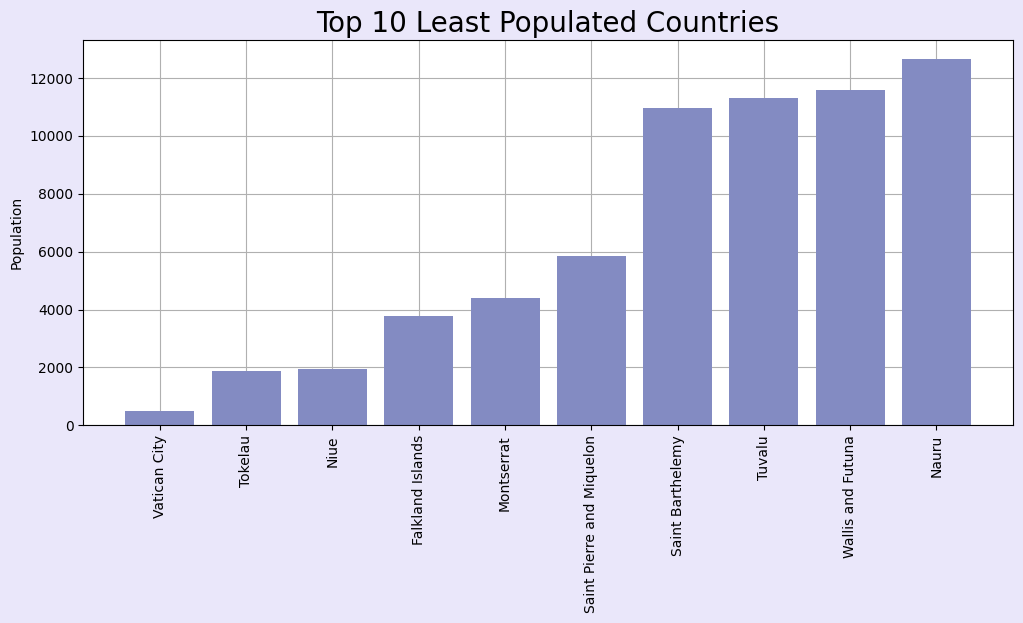

In [19]:
ten_least_populated_countries = df[["Country","2022 Population"]].sort_values(by = "2022 Population", ascending = True).head(10)

plt.figure(figsize = (12,5), facecolor = background)

plt.bar(ten_least_populated_countries["Country"],ten_least_populated_countries["2022 Population"], color = periwinkle)

plt.ylabel("Population")
plt.title("Top 10 Least Populated Countries", fontsize = 20)

plt.xticks(rotation = 90)

plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

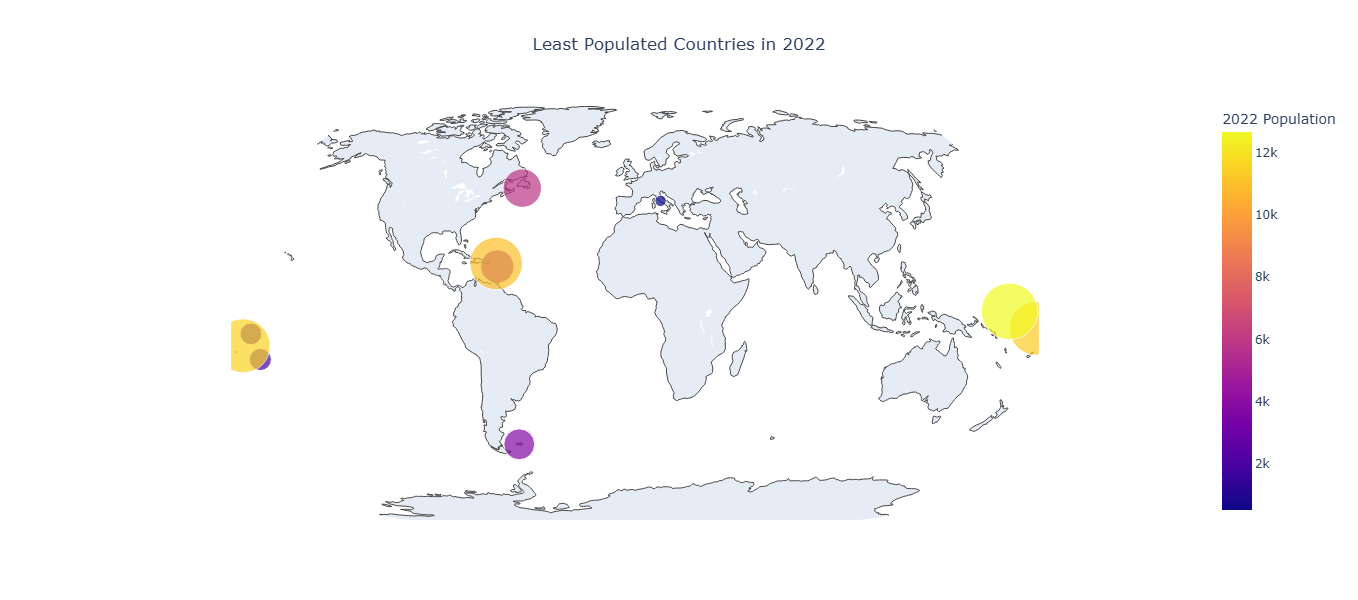

In [20]:
Latitude = [41.9029, -9.200, -19.0544, -51.7963, 16.7425, 46.8852, 17.8964, -7.1095, -13.7686, -0.5228]
Longitude = [12.4534, -171.857, -169.8672, -59.5236, -62.1874, -56.3333, -62.8339, 179.194, -176.2047, 166.9315]


fig = px.scatter_geo(ten_least_populated_countries,
                     lat = Latitude,
                     lon = Longitude,
                     color="2022 Population",
                     hover_name="Country",
                     size="2022 Population",
                     projection="natural earth",
                     title="Most Populated Countries in 2022",
                     color_continuous_scale=px.colors.sequential.Plasma,
                     size_max=40)
fig.update_layout(
    title_text = "Least Populated Countries in 2022",
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = True,
        projection_type = "natural earth"
    ),
     width=1000,
     height=600
)

fig.show()


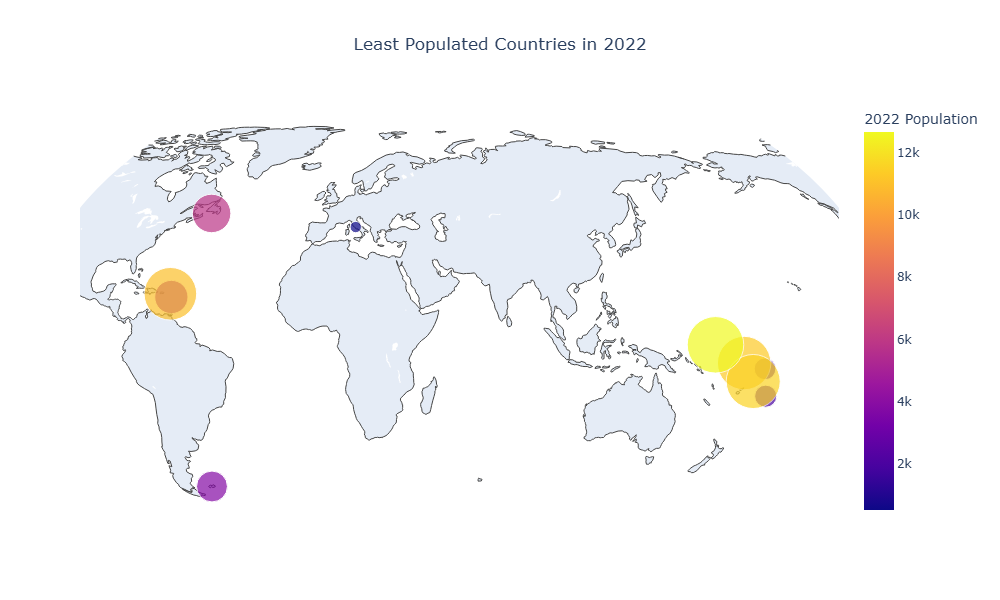

## Most Populated Countries By Continent

In [21]:
# Sort by continent and population in descending order
df_sorted = df.sort_values(by=["Continent", "2022 Population"], ascending=[True, False])

# Group by continent and select the top 3 most populous countries
top_3_countries_per_continent = df_sorted.groupby("Continent").head(3).reset_index(drop=True)

top_3_countries_per_continent[["Continent","Country","2022 Population"]]



Continent           Country  2022 Population
0          Africa           Nigeria     218541212.00
1          Africa          Ethiopia     123379924.00
2          Africa             Egypt     110990103.00
3            Asia             China    1425887337.00
4            Asia             India    1417173173.00
5            Asia         Indonesia     275501339.00
6          Europe            Russia     144713314.00
7          Europe           Germany      83369843.00
8          Europe    United Kingdom      67508936.00
9   North America     United States     338289857.00
10  North America            Mexico     127504125.00
11  North America            Canada      38454327.00
12        Oceania         Australia      26177413.00
13        Oceania  Papua New Guinea      10142619.00
14        Oceania       New Zealand       5185288.00
15  South America            Brazil     215313498.00
16  South America          Colombia      51874024.00
17  South America         Argentina      45510318.00

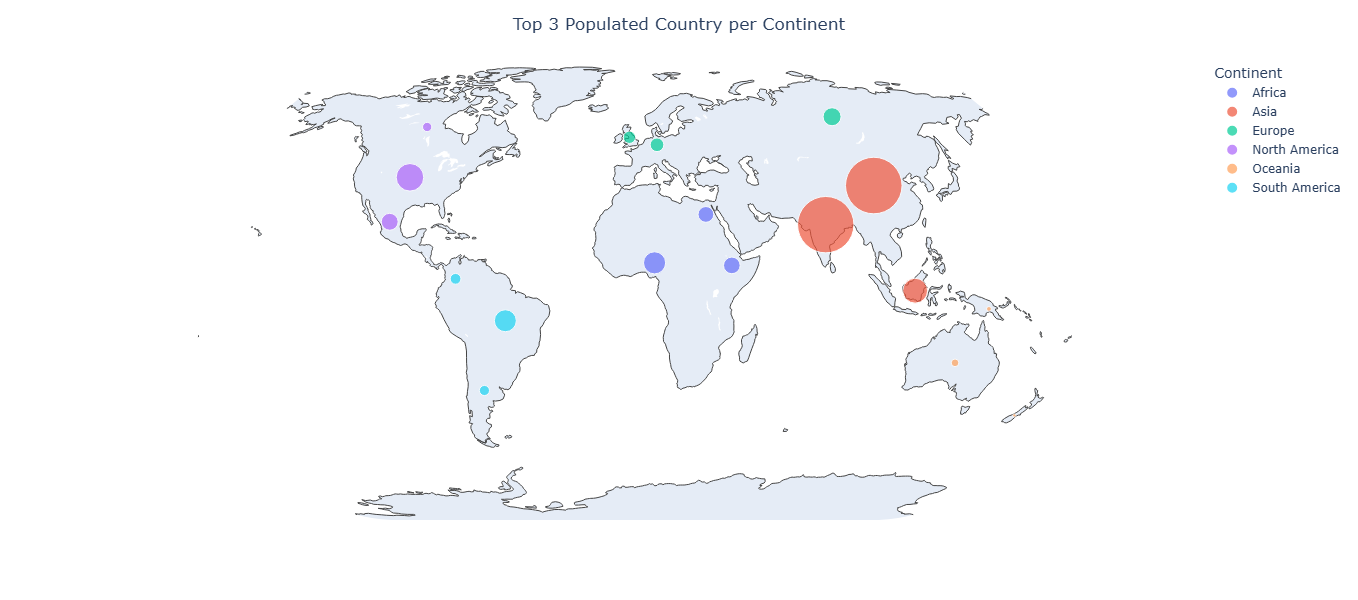

In [22]:
fig = px.scatter_geo(top_3_countries_per_continent,
                     locations="Country",
                     locationmode="country names",
                     color="Continent",
                     hover_name="Country",
                     size = "2022 Population",
                     projection="natural earth",
                     color_continuous_scale=px.colors.sequential.Plasma,
                     size_max=40)
fig.update_layout(
    title_text =  "Top 3 Populated Country per Continent",
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = True,
        projection_type = "natural earth"
    ),
     width=1000,
     height=600
)

fig.show()


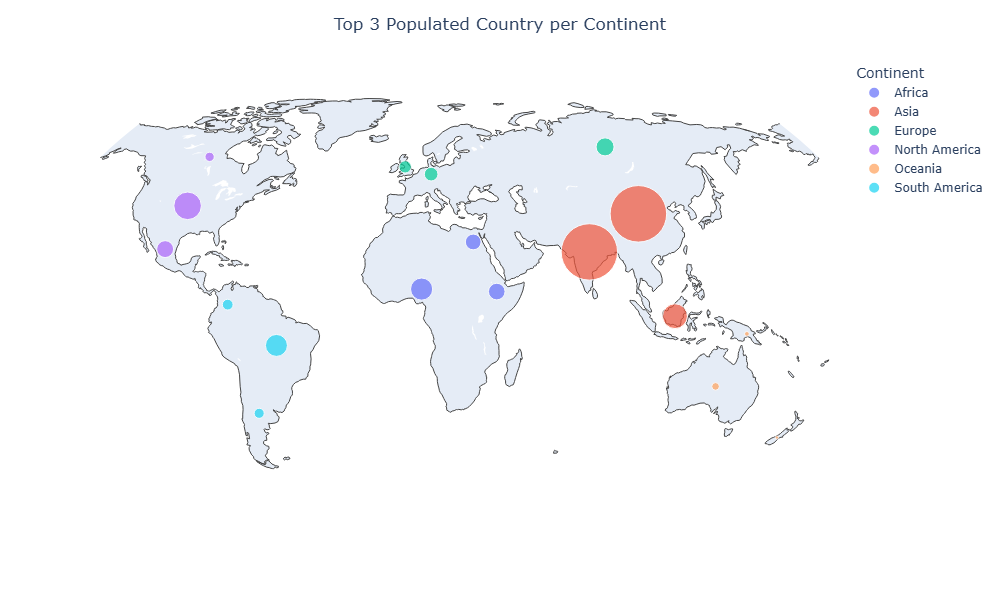

## Top 10 Highest Density Countries (per km²)

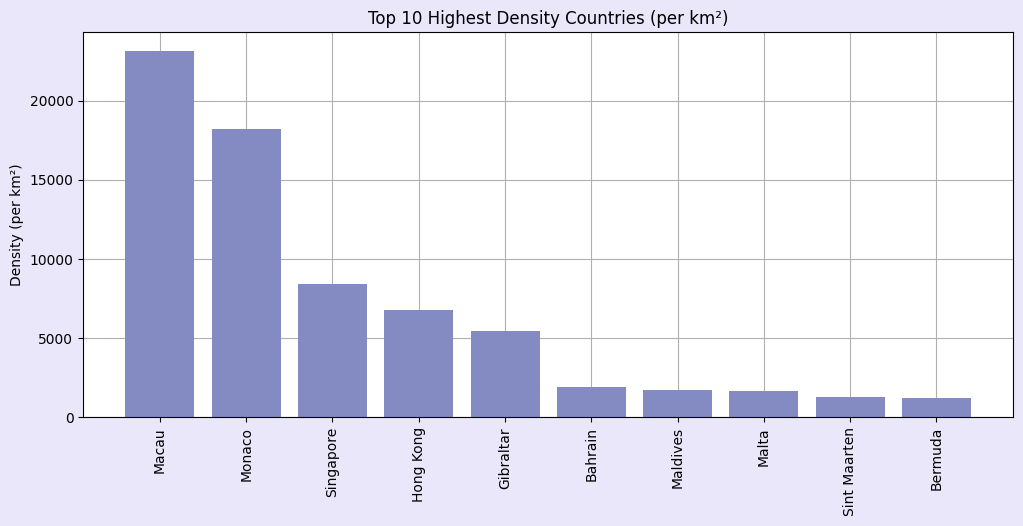

In [23]:
top_10_density = df[["Country","Density (per km²)", "2022 Population"]].sort_values(by = "Density (per km²)", ascending = False).head(10)

plt.figure(figsize = (12,5), facecolor = background)

plt.bar(top_10_density["Country"], top_10_density["Density (per km²)"], color = periwinkle)

plt.ylabel("Density (per km²)")
plt.title("Top 10 Highest Density Countries (per km²)")
plt.xticks(rotation = 90)

plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

## Top 10 Lowest Density Countries (per km²)

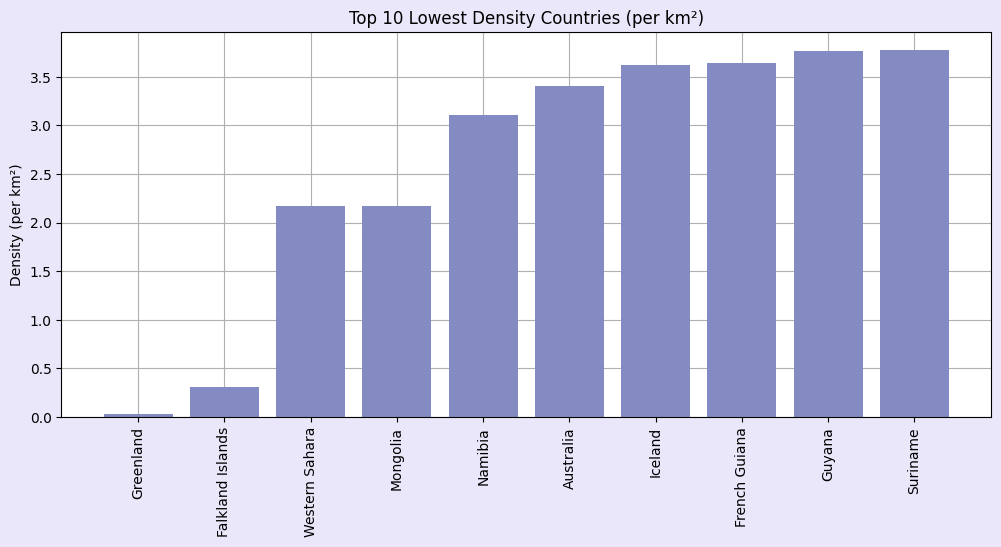

In [24]:
top_10_lowest_density = df[["Country","Density (per km²)", "2022 Population"]].sort_values(by = "Density (per km²)", ascending = True).head(10)

plt.figure(figsize = (12,5), facecolor = background)

plt.bar(top_10_lowest_density["Country"], top_10_lowest_density["Density (per km²)"], color = periwinkle)

plt.ylabel("Density (per km²)")
plt.title("Top 10 Lowest Density Countries (per km²)")
plt.xticks(rotation = 90)

plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

## Top 10 Countries with Largest Area

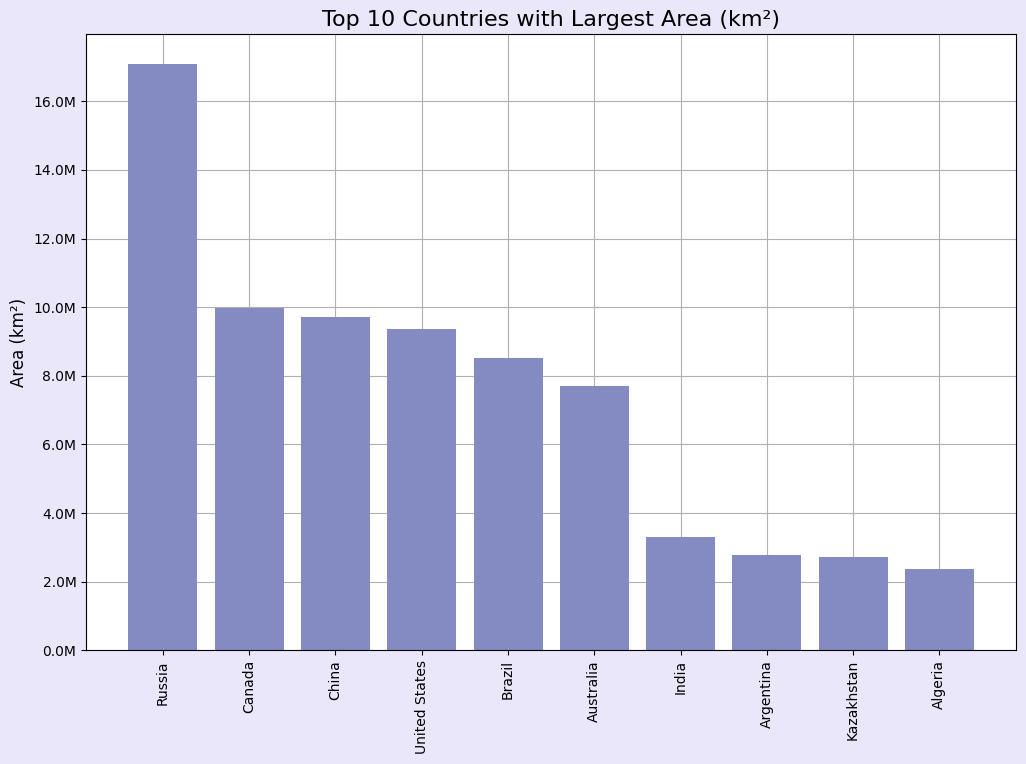

In [25]:
top_10_area = df[["Country", "Area (km²)"]].sort_values(by = "Area (km²)", ascending=False).head(10)

plt.figure(figsize=(12, 8), facecolor=background)

plt.bar(top_10_area["Country"], top_10_area["Area (km²)"], color=periwinkle)

plt.ylabel("Area (km²)", fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.title("Top 10 Countries with Largest Area (km²)", fontsize=16)

plt.xticks(rotation=90)

plt.grid()
plt.gca().set_axisbelow(True)

plt.show()


## Top 10 Countryies With Smallest Area

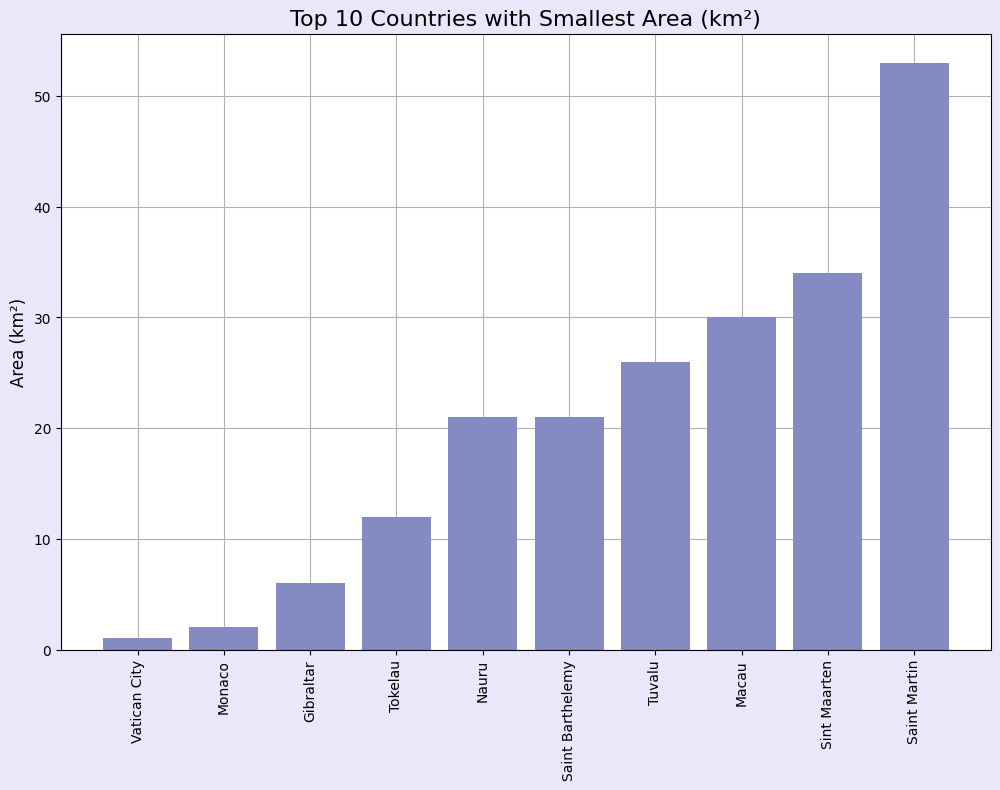

In [26]:
top_10_smallest_area = df[["Country", "Area (km²)"]].sort_values(by = "Area (km²)", ascending=True).head(10)

plt.figure(figsize=(12, 8), facecolor=background)

plt.bar(top_10_smallest_area["Country"], top_10_smallest_area["Area (km²)"], color=periwinkle)

plt.ylabel("Area (km²)", fontsize=12)
plt.title("Top 10 Countries with Smallest Area (km²)", fontsize=16)

plt.xticks(rotation=90)

plt.grid()
plt.gca().set_axisbelow(True)

plt.show()